T_c = 3.777808889327008 K


/var/folders/45/47c2yjg15c9d6fw4ftsqnx680000gn/T/ipykernel_30540/2179991027.py:36: RuntimeWarning: divide by zero encountered in divide
  n_i = 1/(np.exp(β*(ϵ - u)) - 1)
/var/folders/45/47c2yjg15c9d6fw4ftsqnx680000gn/T/ipykernel_30540/2179991027.py:37: RuntimeWarning: invalid value encountered in divide
  ℰ_i = ϵ/(np.exp(β*(ϵ - u)) - 1)
/var/folders/45/47c2yjg15c9d6fw4ftsqnx680000gn/T/ipykernel_30540/2179991027.py:39: RuntimeWarning: invalid value encountered in multiply
  n[i] = C * np.trapz(p**2 * n_i, p)


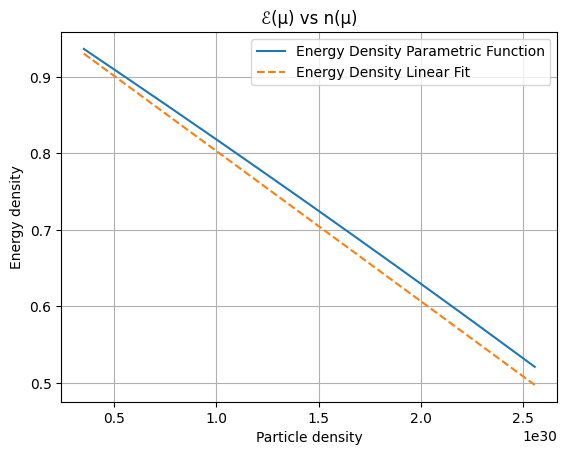

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Number of points to evaluate the integrals at
num_points = 10000

# Constants
c = 3e8 # Speed of light (m/s)
ħ = 6.582e-16 # Reduced Planck's constant (eV*s) | 1.054*pow(10,-34) (J*s)
k = 8.617e-5 # Boltzmann's constant (eV/K) | 1.38*pow(10,-23) (J/K)
n_a = 6.022e23 # Avogadro's number / cm^3


T = 1e5 # K
β = 1 / (k*T) # 1/eV

m = 2829570 / c**2 # eV/c | Mass of helium-4 atom
ζ1 = 2.612 # Riemann zeta function evaluated at 3/2
ζ2 = 1.341 # Riemann zeta function evaluated at 5/2
C = 1/2 * np.pi**-2 * ħ**-3

μ = np.linspace(-10, 0, num_points) # eV
p = np.linspace(0,1e5 / c,num_points) # Momentum (eV/c)
ϵ = p**2 / (2*m) # J

# This function creates an array of zeros with the same shape and data type as the input array μ.
# In this context, μ is an array created using np.linspace(), so np.zeros_like(μ) creates an array of zeros with the same shape as μ.
n = np.zeros_like(μ) # Particle density
e = np.zeros_like(μ) # Energy density
e_classical = np.zeros_like(μ) # Classical energy density

"""
np.trapz(p**2 * n_i, p): This function computes the definite integral of the product of p**2 * n_i with respect to p, using the trapezoidal rule. The p**2 * n_i represents the integrand (the function to be integrated), and p represents the variable of integration. The np.trapz() function numerically approximates the integral using the trapezoidal rule, which approximates the area under the curve by dividing it into trapezoids.
In this context, p**2 * n_i represents the integrand of the expression you're integrating over the momentum p, and p is the range over which you're integrating. By passing these arguments to np.trapz(), you get the numerical approximation of the integral of p**2 * n_i with respect to p. This integral is essentially computing the expectation value of p**2 * n_i with respect to the momentum p.
"""
# Loop over each value of μ
for i,u in enumerate(μ):
    # Calculate the integrands for n(μ) and ℰ(μ)
    n_i = 1/(np.exp(β*(ϵ - u)) - 1)
    e_i = ϵ/(np.exp(β*(ϵ - u)) - 1)
    # Perform the integration over momentum
    n[i] = C * np.trapz(p**2 * n_i, p)
    e[i] = C * np.trapz(p**2 * e_i, p)
    # np.quad(lambda x: x**2 * n_i, 0, 1e6)

e_classical = 3/2 * n * k * T


# Calculate the critical density
n_c = (m / (2 * π * ħ**2 * β))**(3/2) * ζ1 # Critical density
# n_c = n_0 * ζ1 * (T / T_c)**(3/2) # Critical density at T = T_c

e_a = 1 - (0.51 / n_c) * n

T_c = (n_a * T**(3/2) / n_c)**(2/3) # Critical temperature
print(f'T_c = {T_c} K')


# Plot the results
plt.plot(n, e/e_classical, label='Energy Density Parametric Function')
plt.plot(n, e_a, linestyle='--', label='Energy Density Linear Fit')
#plt.xscale('log')
plt.title('e(μ) vs n(μ)')
plt.xlabel('Particle density')
plt.ylabel('Energy density')
plt.grid()
plt.legend()
plt.show()

(b) & (c)

/var/folders/45/47c2yjg15c9d6fw4ftsqnx680000gn/T/ipykernel_30540/3061544649.py:2: RuntimeWarning: divide by zero encountered in divide
  β_l = 1 / (k*T_n) # 1/eV
/var/folders/45/47c2yjg15c9d6fw4ftsqnx680000gn/T/ipykernel_30540/3061544649.py:11: RuntimeWarning: invalid value encountered in divide
  plt.plot(T_n, ℰ_l/ℰ_classical, label='Energy Density Parametric Function')


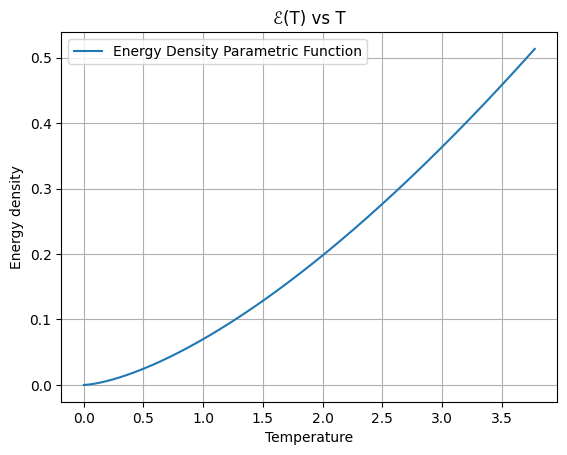

In [8]:
T_n = np.linspace(0, T_c, num_points) # Temperature (K)
β_l = 1 / (k*T_n) # 1/eV
n_c = (m / (2 * π * ħ**2 * β_l))**(3/2) * ζ1 # Critical density

e_classical = np.zeros_like(T) # Classical energy density
e_classical = 3/2 * n_a * k * T_n

e_l = 3/2 * n_c * β_l**-1 * ζ2 / ζ1

# Plot the results
plt.plot(T_n, e_l/e_classical, label='Energy Density Parametric Function')
#plt.xscale('log')
plt.title('e(T) vs T')
plt.xlabel('Temperature')
plt.ylabel('Energy density')
plt.grid()
plt.legend()
plt.show()

/var/folders/45/47c2yjg15c9d6fw4ftsqnx680000gn/T/ipykernel_30540/1218618921.py:7: RuntimeWarning: invalid value encountered in divide
  plt.plot(T_n, ℰ_l/ℰ_classical, label='Energy Density T < T_c')


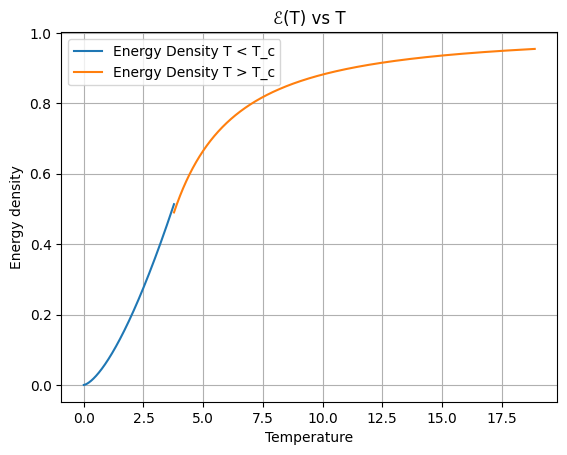

In [9]:
T = np.linspace(T_c, 5*T_c, num_points) # K
β = 1 / (k*T) # 1/eV

e_h = 1 - 0.51*(T_c / T)**(3/2)

# Plot the results
plt.plot(T_n, e_l/e_classical, label='Energy Density T < T_c')
plt.plot(T, e_h, label='Energy Density T > T_c')
plt.title('e(T) vs T')
plt.xlabel('Temperature')
plt.ylabel('Energy density')
plt.grid()
plt.legend()
plt.show()

[0.20239712 0.20219488 0.20199293 ... 0.00362421 0.00362349 0.00362276]
[7.7837361e+19 7.7837361e+19 7.7837361e+19 ... 7.7837361e+19 7.7837361e+19
 7.7837361e+19]


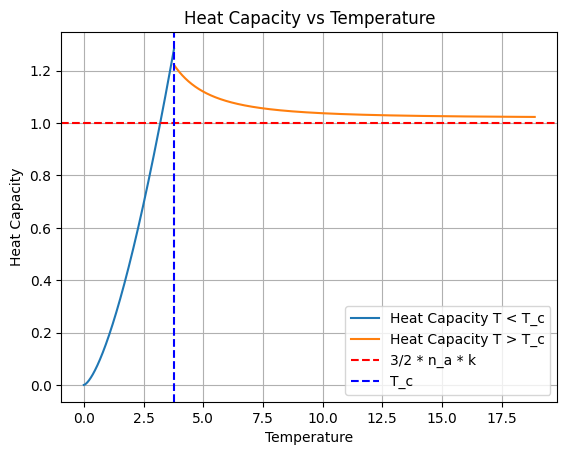

In [10]:
# Calculate the specific heat
#T = np.linspace(0, 10*T_c, num_points) # K

C_l = np.diff(e_l)/np.diff(T_n) # heat capacity
C_h = np.diff(e_h)/np.diff(T) # heat capacity
#C_h = 1.5 * n_a * k * T**(-1.5) * 0.51 * (T_c / T)**(5/2)
#C_h = 1.5 * 0.5 * T**(-5/2) * T_c**(3/2)
#C = np.concatenate((C_l, C_h)) # heat capacity

#T_s = np.linspace(0, 5*T_c, 2*num_points) # K
e_classical = np.zeros_like(T_n) # Classical energy density
e_classical = 3/2 * n_a * k * T_n
C_classical = np.diff(e_classical)/np.diff(T_n) # Classical heat capacity

print(C_h)
print(C_classical)

# Plot the results
#plt.plot(T_s[:-1], C/C_classical, label='Heat Capacity Parametric Function')
plt.plot(T_n[:-1], C_l/C_classical, label='Heat Capacity T < T_c')
plt.plot(T[:-1], C_h+1.02, label='Heat Capacity T > T_c')
# Plot the dotted line at the specified height
plt.axhline(y=1, color='r', linestyle='--', label='3/2 * n_a * k')
plt.axvline(x=T_c, color='b', linestyle='--', label = 'T_c')
plt.title('Heat Capacity vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Heat Capacity')
plt.grid()
plt.legend()
plt.show()